/home/dominik/.anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


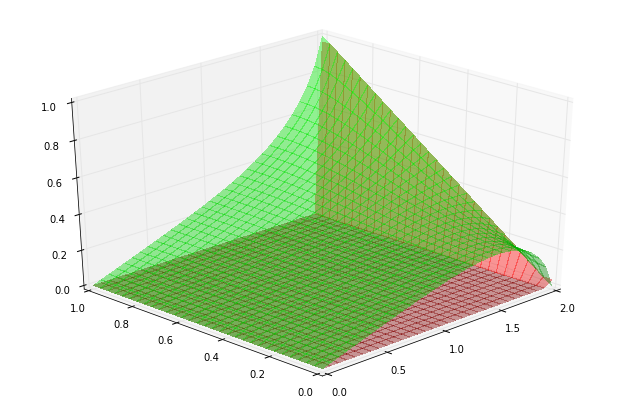

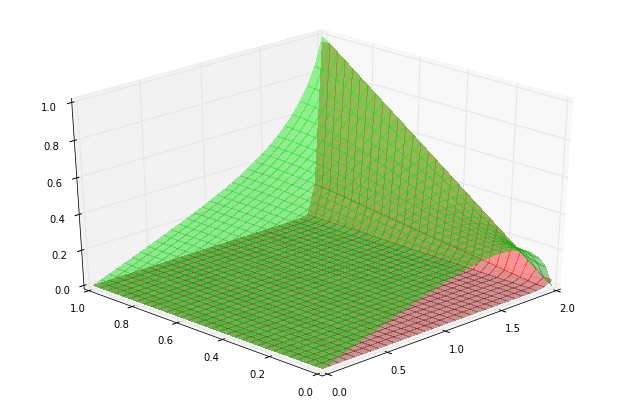

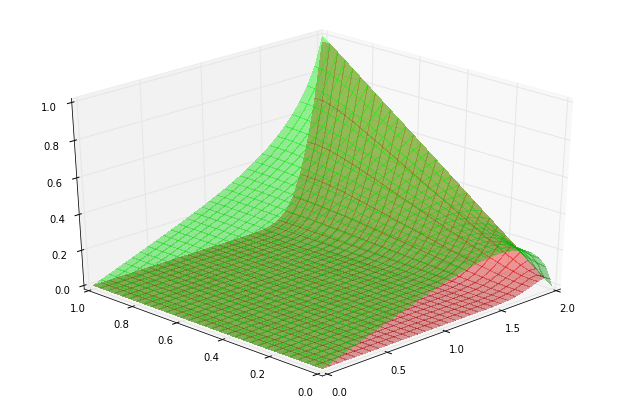

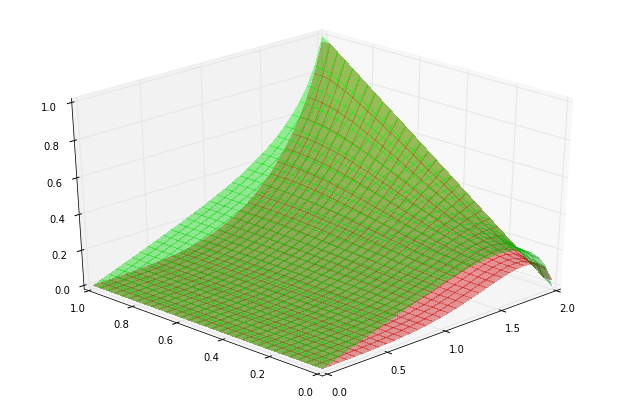

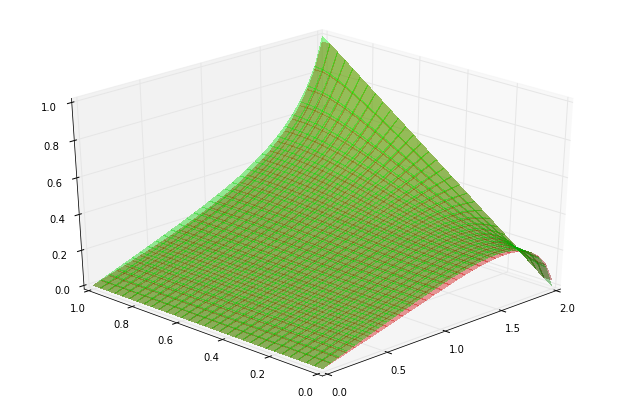

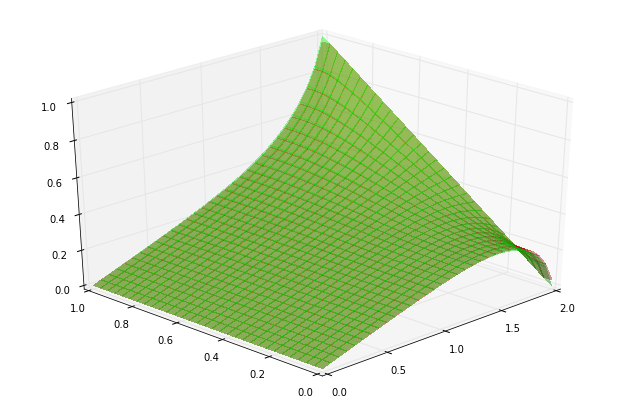

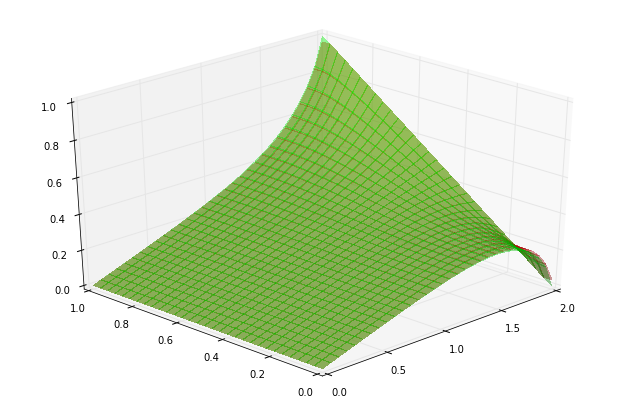

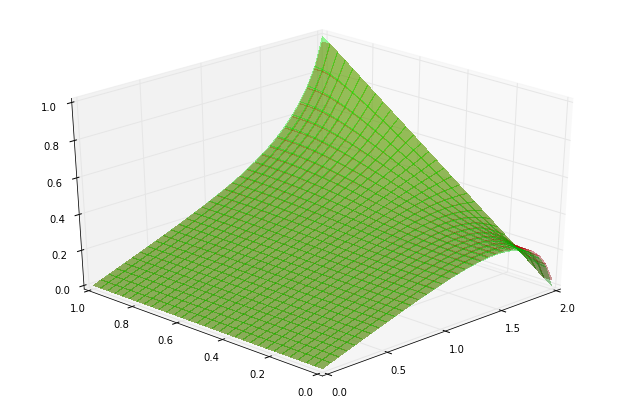

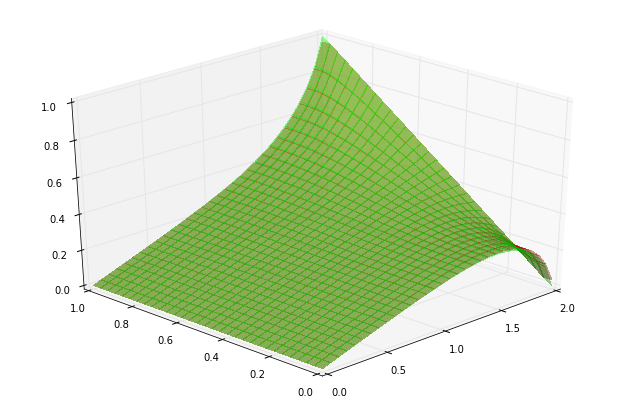

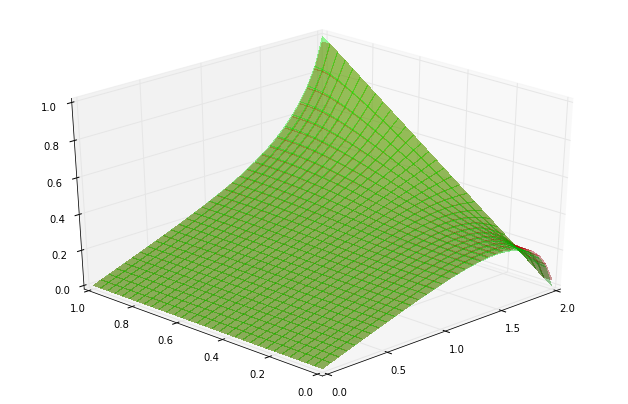

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

def plot2D(X, Y, p1, p2="empty"):
    fig = plt.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    surf1 = ax.plot_surface(X, Y, p1, rstride=1, cstride=1,
        color=[1,0,0,0.4], antialiased=False, linewidth=0)
    if p2 != "empty":
        surf2 = ax.plot_surface(X, Y, p2, rstride=1, cstride=1,
            antialiased=False, linewidth=0, color=[0,1,0,0.4])
    ax.set_xlim(0,2)
    ax.set_ylim(0,1)
    ax.view_init(30,225)

def laplace2d(p, y, dx, dy, l1norm_target):
    l1norm = 1
    
    while l1norm > l1norm_target:
        pn = p.copy()
        p[1:-1, 1:-1] = (dy**2*(pn[1:-1, 2:] + pn[1:-1, :-2])+\
                         dx**2*(pn[2:,1:-1] + pn[0:-2, 1:-1]))/\
                         (2*(dx**2+dy**2))
        p[:,0] = 0
        p[:,-1] = y
        p[0,:] = p[1,:]
        p[-1,:] = p[-2,:]
        l1norm = np.sum(np.abs(p)-np.abs(pn))/np.sum(np.abs(pn))
    return p
    
def calculate_analytic_p(X, Y, N):
    n_vector = np.arange(1,100,2)
    p_analytic = X/4
    for n in n_vector:
        p_analytic -= 4*np.sinh(n*np.pi*X)*np.cos(n*np.pi*Y)/((n*np.pi)**2*np.sinh(2*n*np.pi))
    return p_analytic    
    
def run(Nx, Ny, precision):
    x, dx = np.linspace(0,2,Nx, retstep=True)
    y, dy = np.linspace(0,1,Ny, retstep=True)
    X, Y = np.meshgrid(x,y)
    p = np.zeros_like(X)
    p[:, 0] = 0
    p[:,-1] = y
    p[0, :] = p[1,:]
    p[-1,:] = p[-2,:]
    
    plot2D(X, Y, laplace2d(p, y, dx, dy, precision), calculate_analytic_p(X,Y,100))

    
for i in range(0,10):
    run(31, 31, 10**-i)